### Bagging, boosting, stacking

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def plot_scatter(X, color, alpha = 5):
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c = color,
                       alpha = alpha,
                       edgecolot = 'k')

In [3]:
n_samples = 1000
random_state = 42
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = n_samples,
                  cluster_std = [1.6, 1.0, 1.5],
                  centers = [(-7, -7), (0, 0), (7, 5)],
                  random_state = random_state)

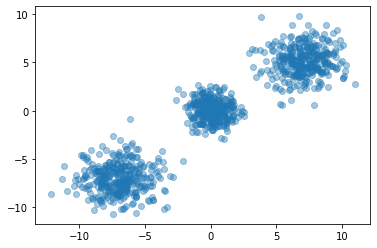

In [4]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.4)

In [5]:
n_classes = 3
n_estimators = 100
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3),
                           n_estimators = n_estimators)
AB_class = model.fit(X, y)
print(AB_class.predict([[-7.5, -8], [0, 0]]))

[0 1]


In [6]:
label_ab = np.array([])
for i in range(len(X)):
    label_ex_ab = model.predict([[X[i, 0], X[i, 1]]])
    label_ab = np.hstack([label_ab, label_ex_ab])

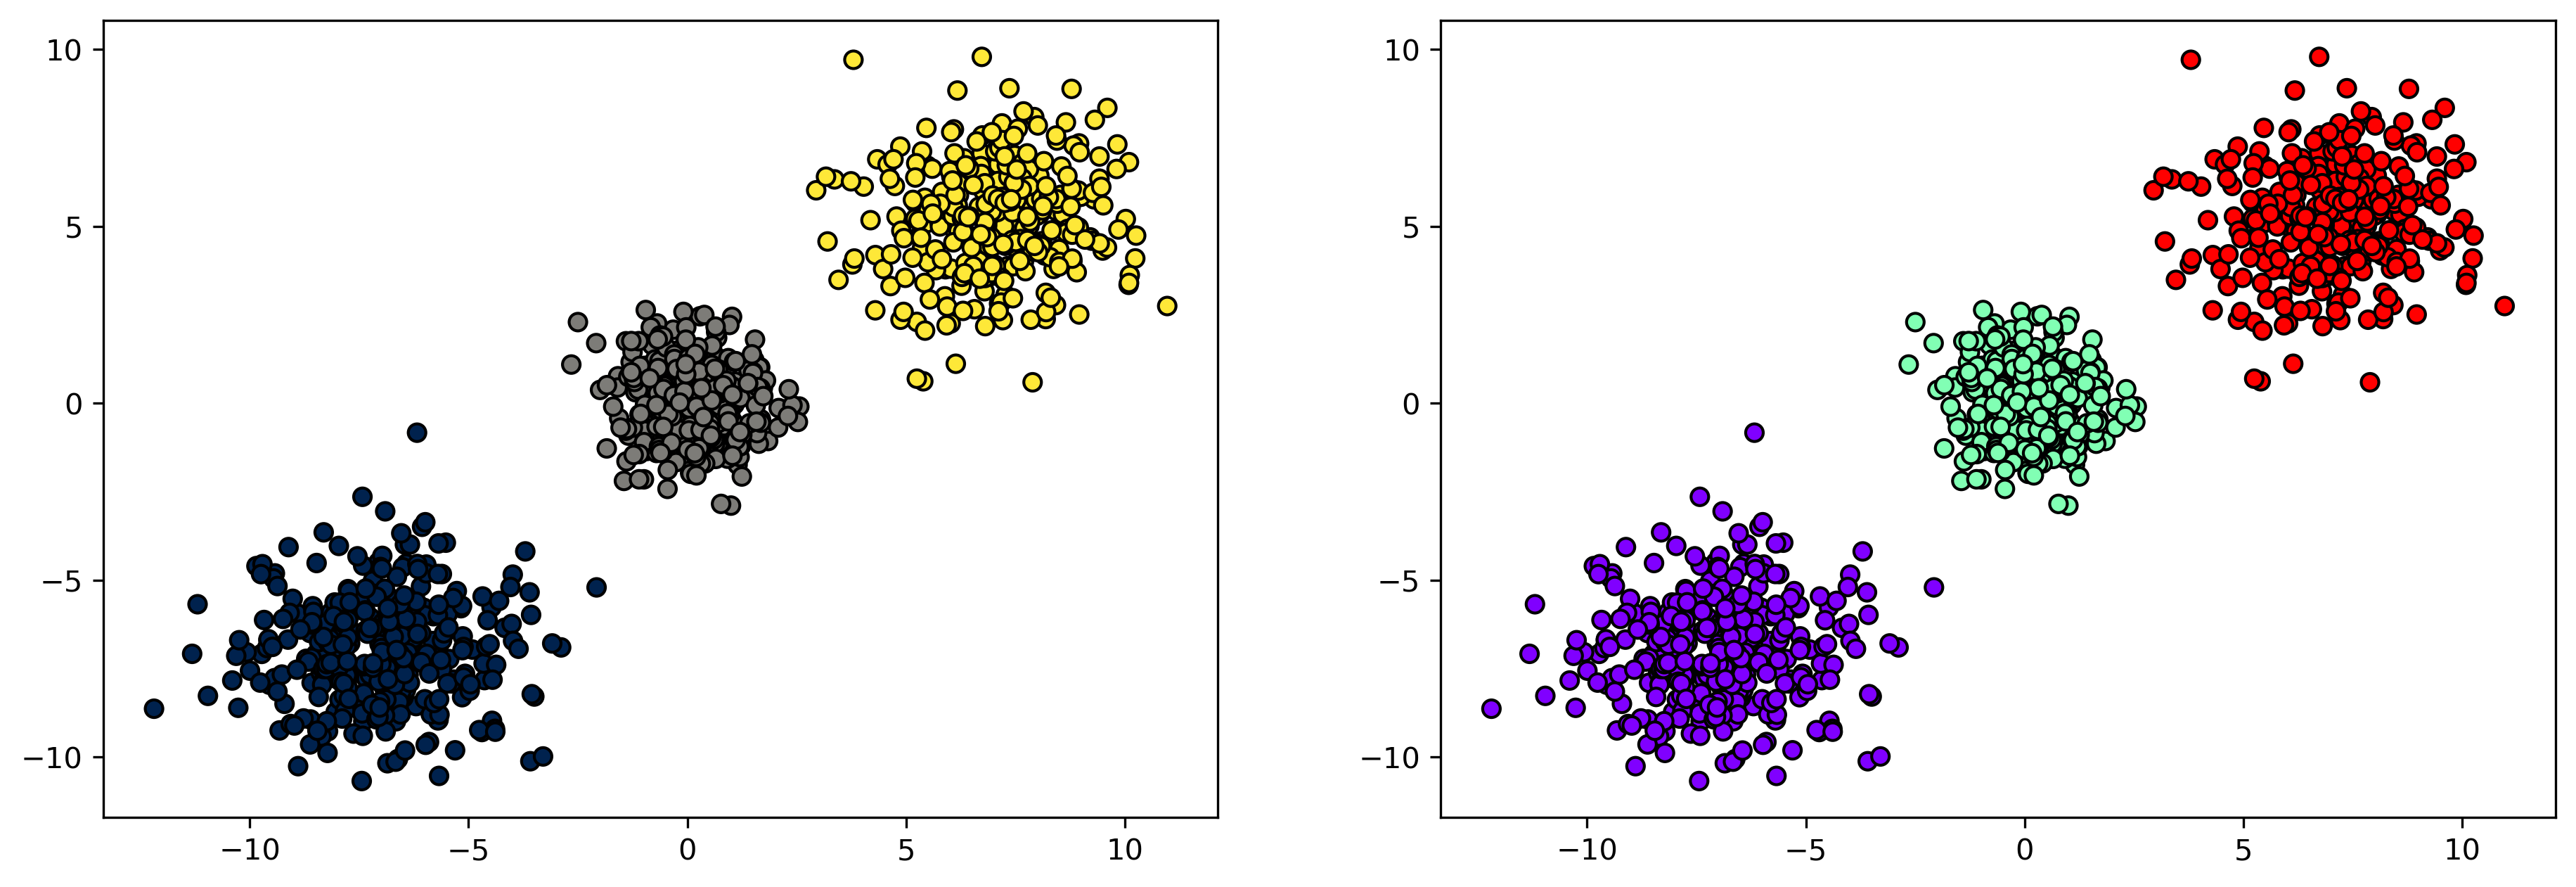

In [7]:
fig = plt.figure(figsize = (15, 5), dpi = 300)
# Априорные данные
ax = fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'cividis', edgecolors = 'k')
# Расчетные данные
ax = fig.add_subplot(122)
plt.scatter(X[:, 0], X[:, 1], c = label_ab, cmap = 'rainbow', edgecolors = 'k')

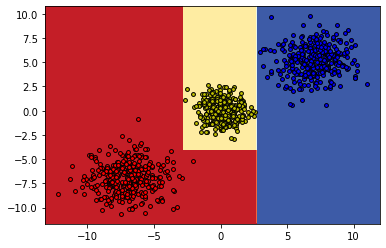

In [8]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
Z = AB_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, cmap = plt.cm.RdYlBu,
                edgecolor = 'black', s = 15)

In [9]:
from sklearn.datasets import make_circles
n_samples = 500
X_cir, y_cir = make_circles(n_samples = n_samples, factor = 0.5, noise = 0.05)

In [10]:
AB_class_cir = model.fit(X_cir, y_cir)
AB_class_cir

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [11]:
label_AB_cir = np.array([])
for i in range(len(X_cir)):
    label_ex_AB_cir = AB_class_cir.predict([[X_cir[i, 0], X_cir[i, 1]]])
    label_AB_cir = np.hstack([label_AB_cir, label_ex_AB_cir])

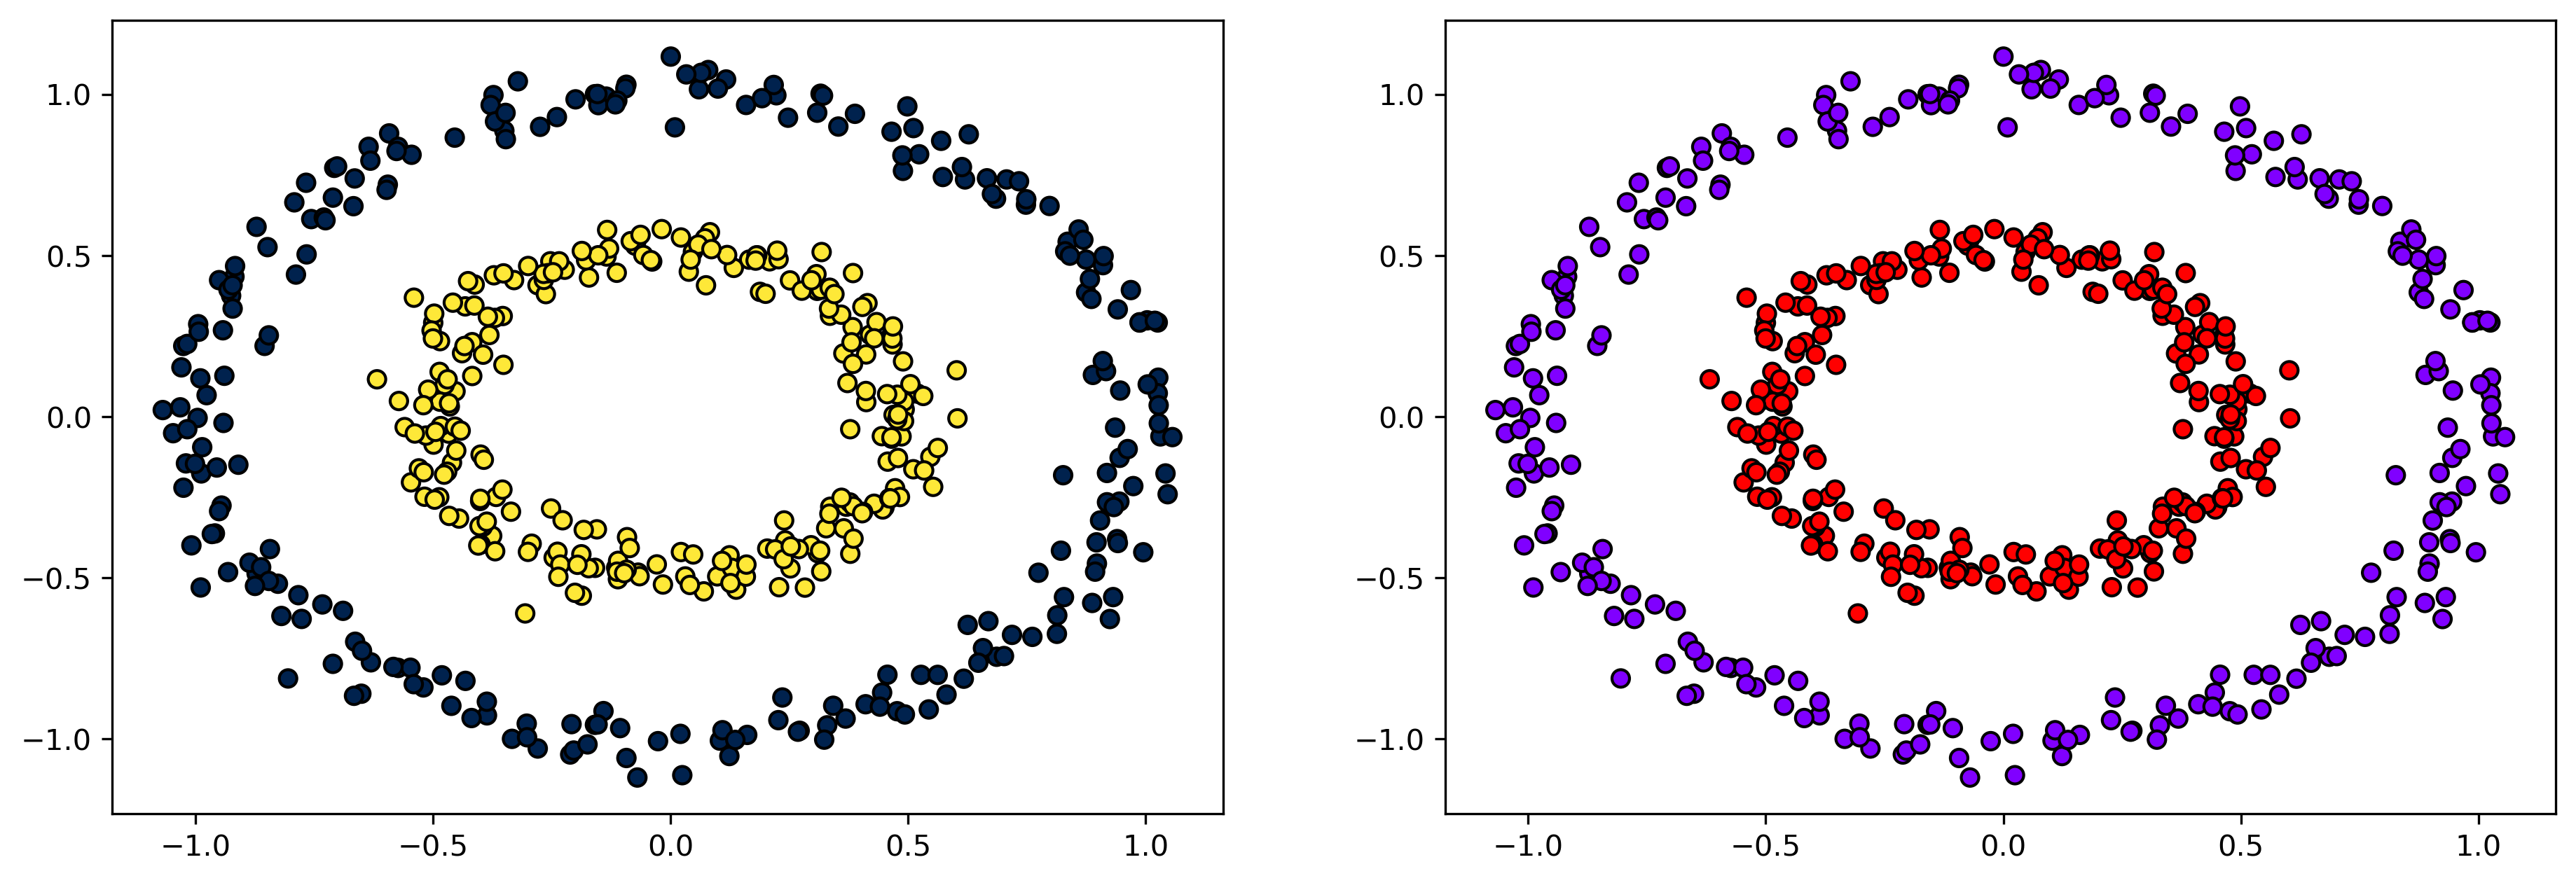

In [12]:
fig = plt.figure(figsize = (15, 5), dpi = 300)
# Априорные данные
ax = fig.add_subplot(121)
plt.scatter(X_cir[:, 0], X_cir[:, 1],
            c = y_cir, cmap = 'cividis', edgecolors = 'k')
# Расчетные данные
ax = fig.add_subplot(122)
plt.scatter(X_cir[:, 0], X_cir[:, 1],
            c = label_AB_cir, cmap = 'rainbow', edgecolors = 'k')

<Figure size 432x288 with 0 Axes>

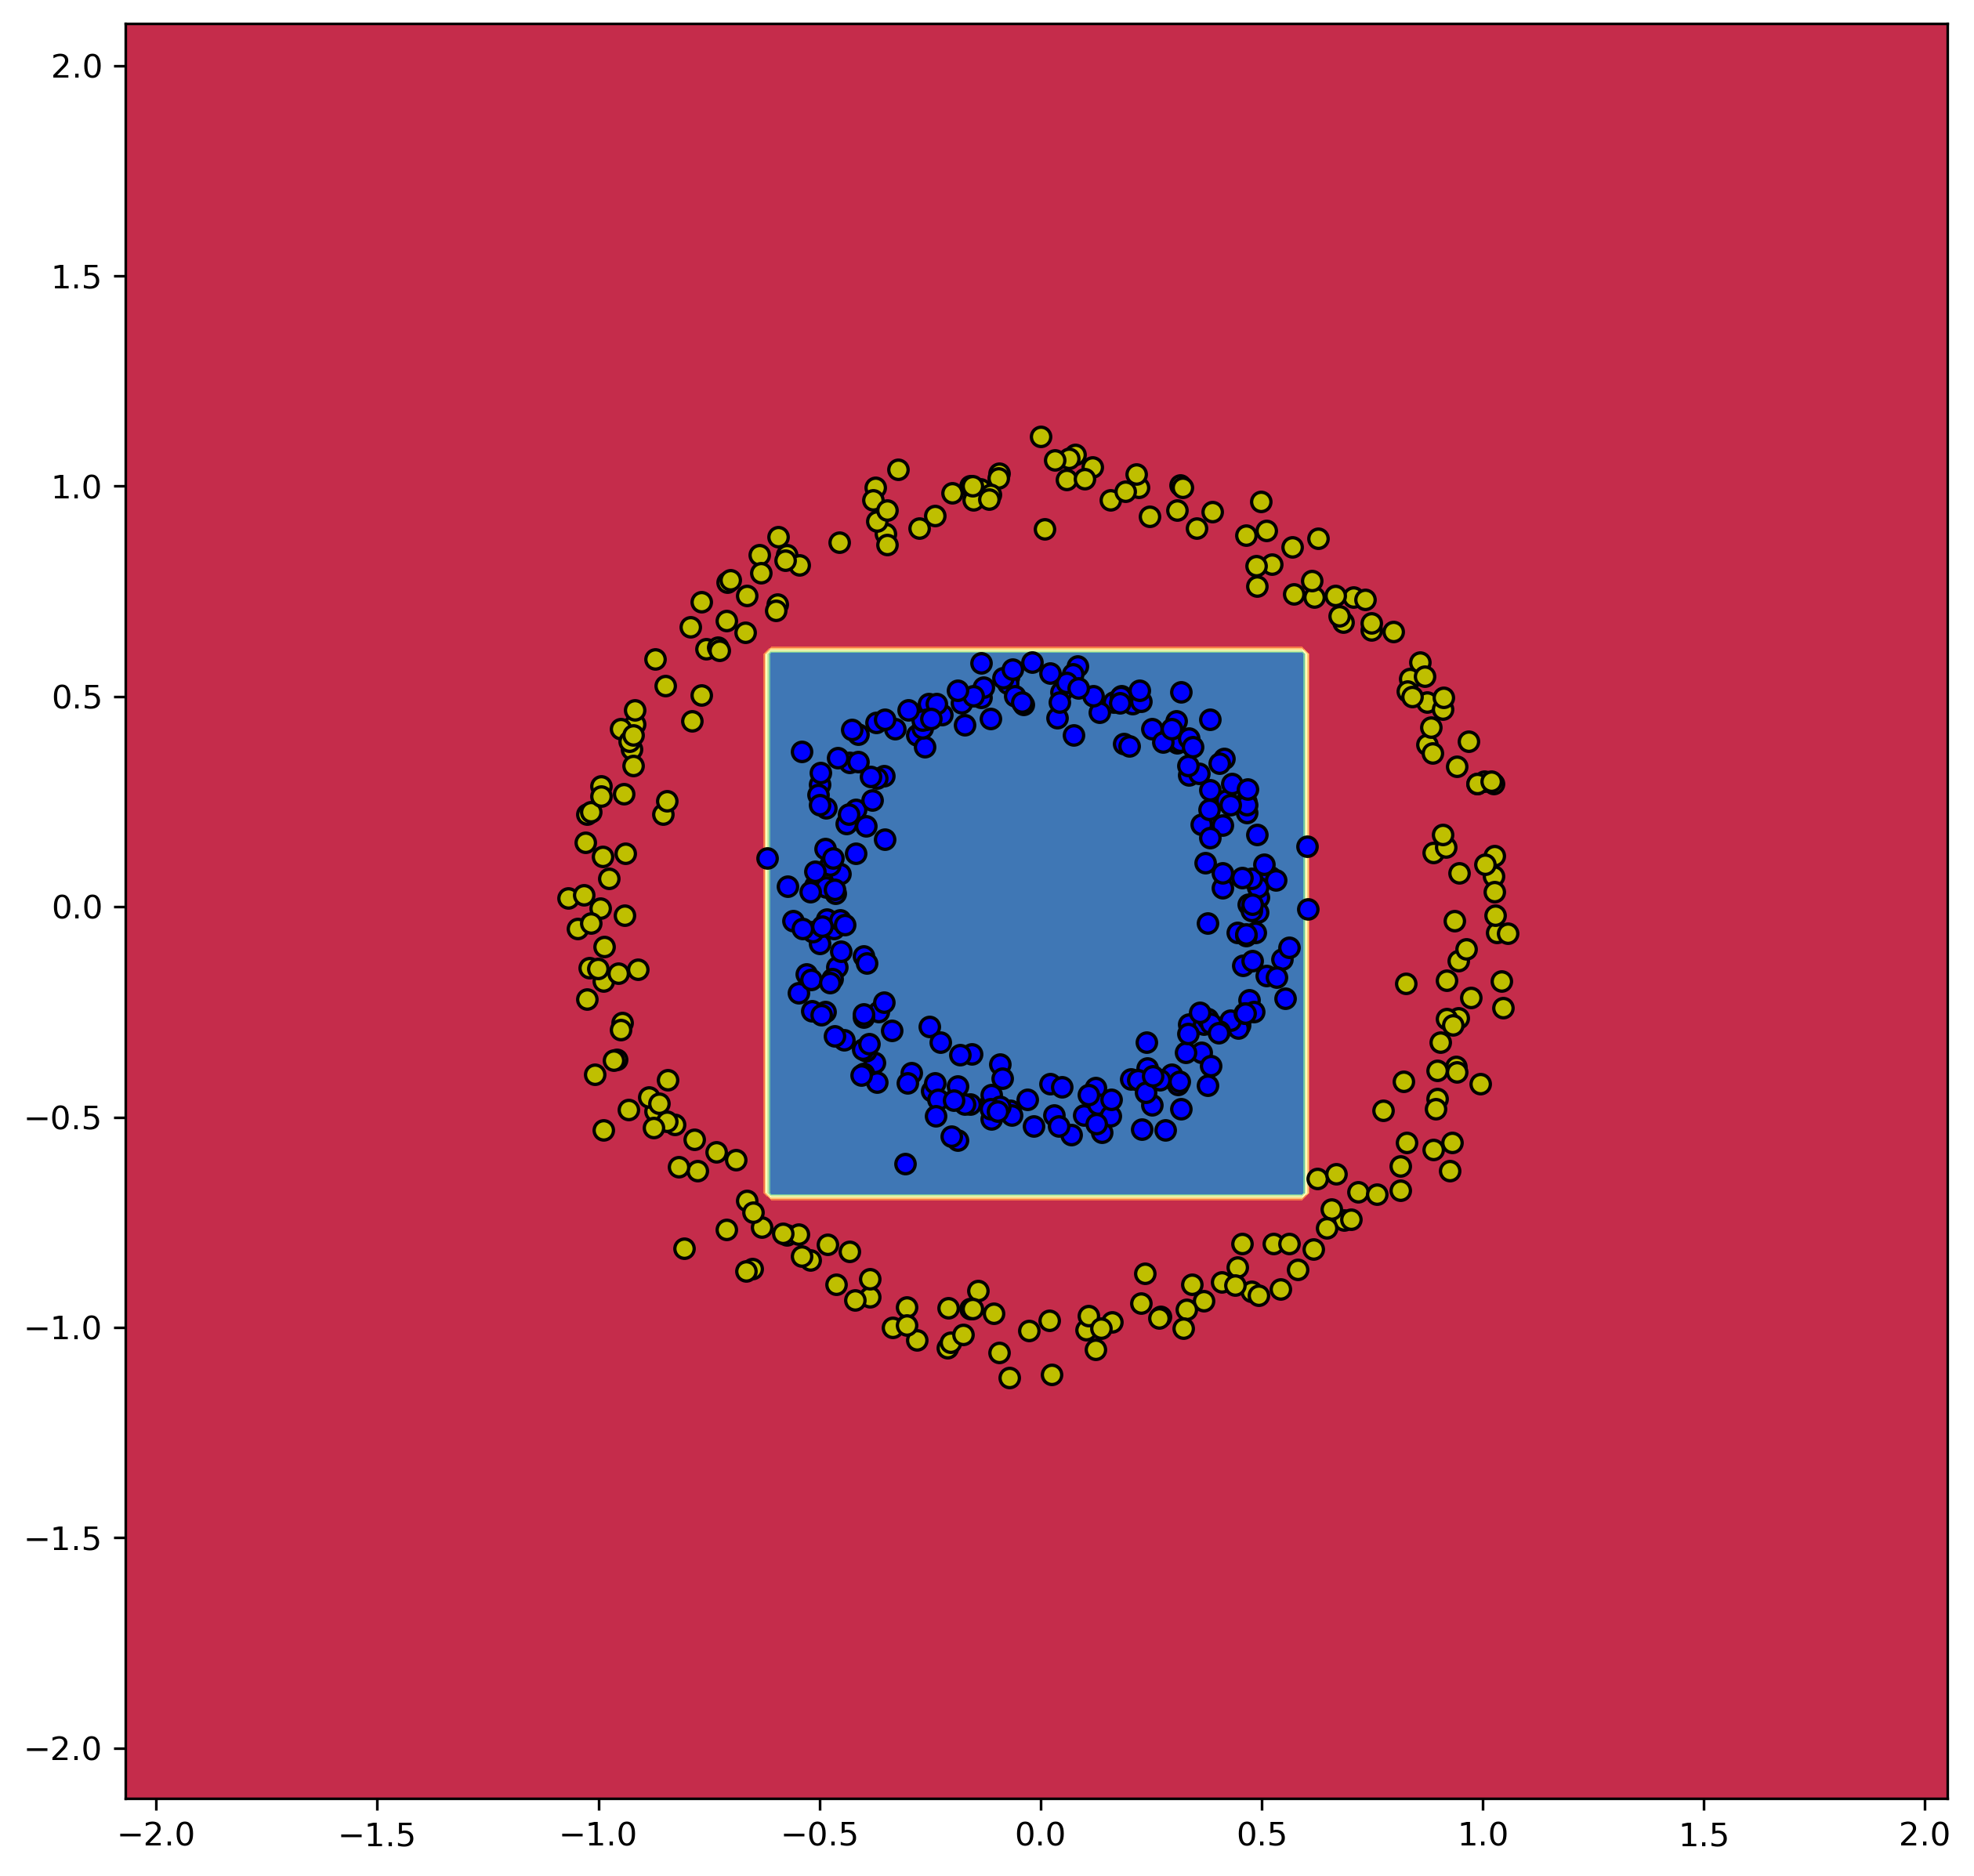

In [13]:
# Рисуем области достяжимости
n_classes = 2
plot_colors = 'yb'
plot_step = 0.02
x_min, x_max = X_cir[:, 0].min() - 1, X_cir[:, 0].max() + 1
y_min, y_max = X_cir[:, 1].min() - 1, X_cir[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad = 0.1, w_pad = 0.1, pad = 1.5)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize = (10, 10), dpi = 300)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_cir == i)
    plt.scatter(X_cir[idx, 0], X_cir[idx, 1], c = color,
                cmap = 'inderno',
                edgecolor = 'black', s = 35)

In [14]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators = n_estimators)
BC_class = model.fit(X, y)
BC_class

BaggingClassifier(n_estimators=100)

In [15]:
label_bc = np.array([])
for i in range(len(X)):
    label_ex_bc = model.predict([[X[i, 0], X[i, 1]]])
    label_bc = np.hstack([label_bc, label_ex_bc])

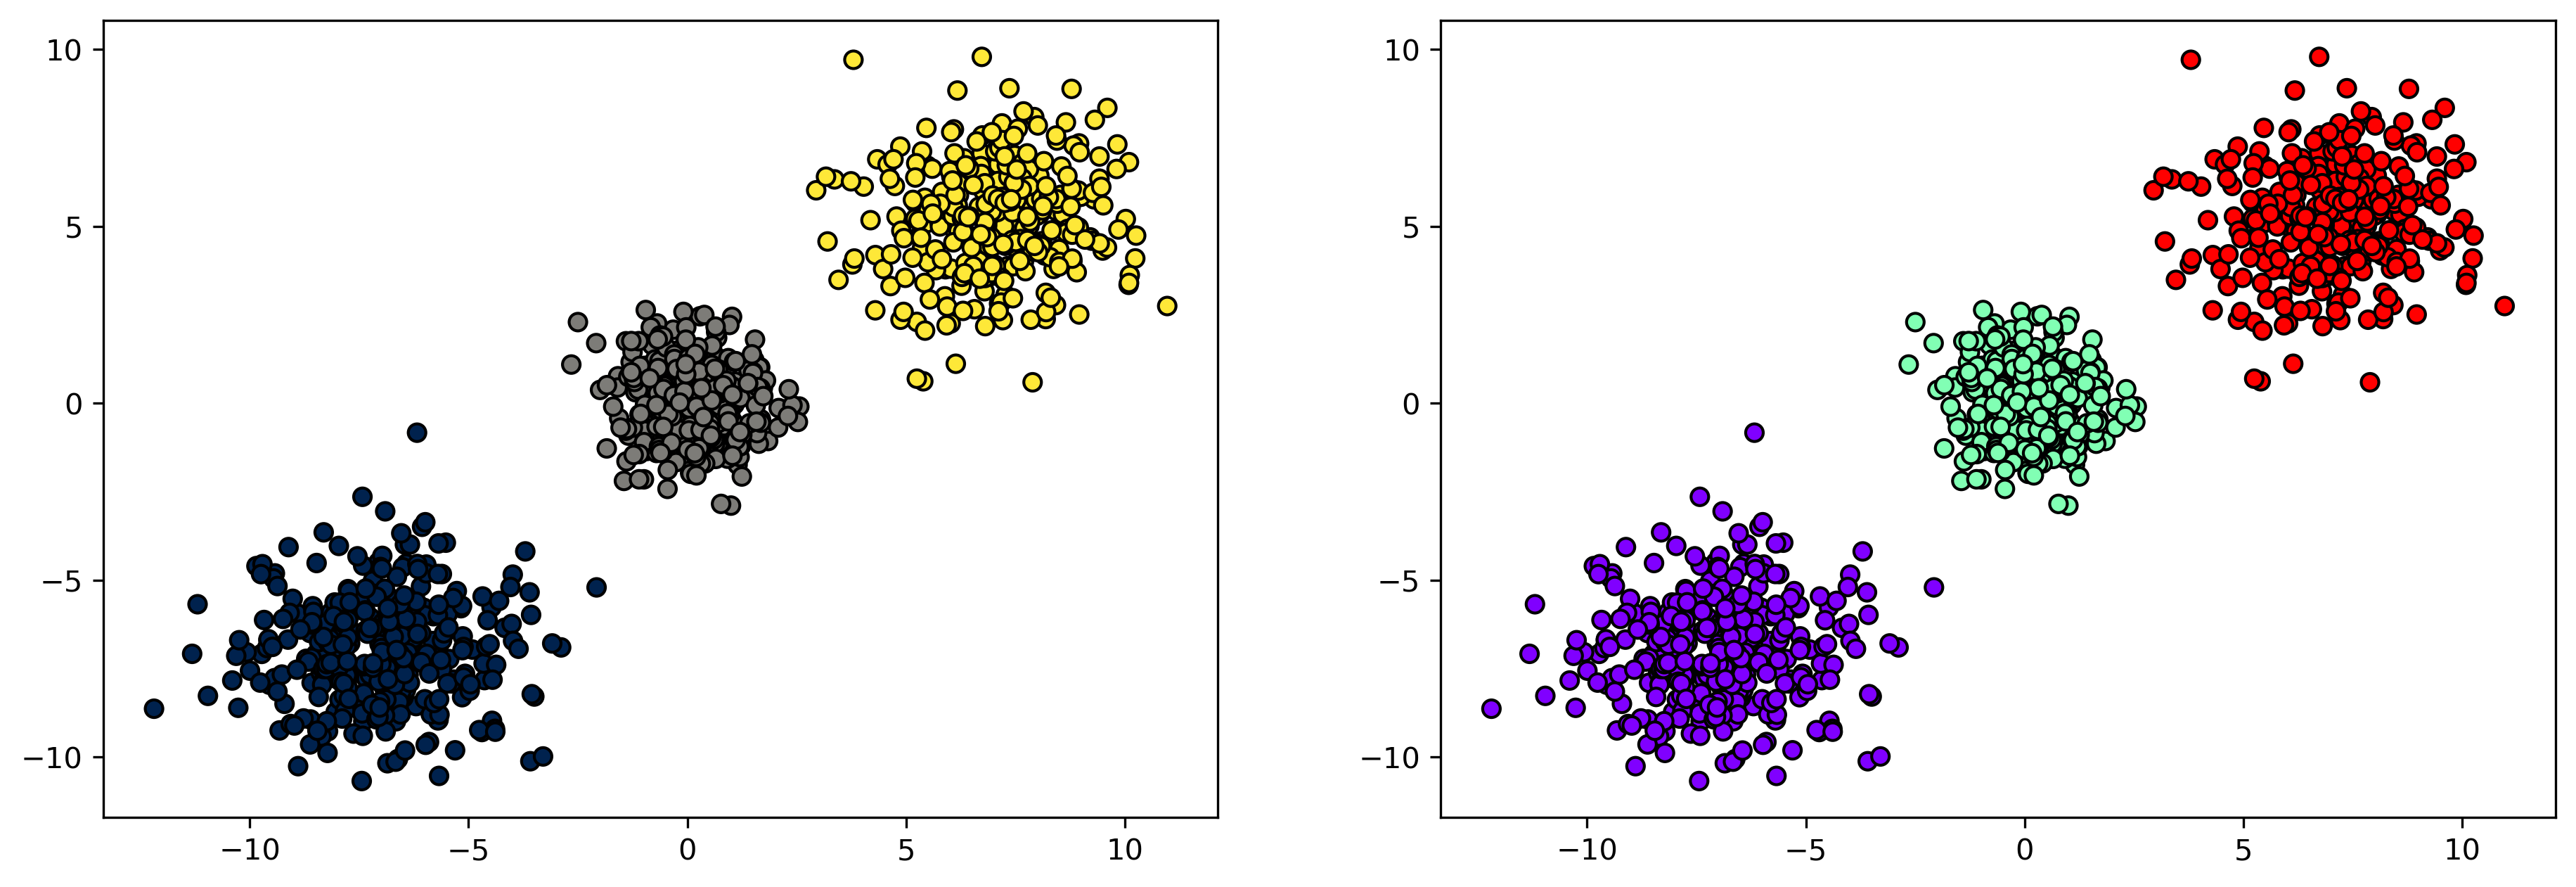

In [16]:
fig = plt.figure(figsize = (15, 5), dpi = 300)
# Априорные данные
ax = fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1],
            c = y, cmap = 'cividis', edgecolors = 'k')
# Расчетные данные
ax = fig.add_subplot(122)
plt.scatter(X[:, 0], X[:, 1],
            c = label_bc, cmap = 'rainbow', edgecolors = 'k')

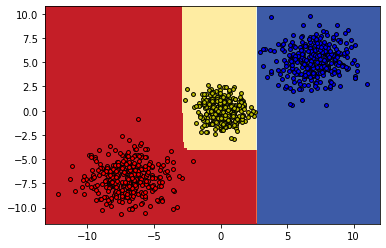

In [17]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
Z = BC_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, cmap = plt.cm.RdYlBu,
                edgecolor = 'black', s = 15)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Методы оценки
estimators = [('rf', RandomForestClassifier(n_estimators = 50,
                                            random_state = 42)),
              ('knn', KNeighborsClassifier(3))]

In [20]:
model_sc = StackingClassifier(estimators = estimators,
                              final_estimator = LogisticRegression())

In [21]:
sc_class = model_sc.fit(X, y)

In [22]:
sc_class.predict([[1, 1], [7, 5]])

array([1, 2])

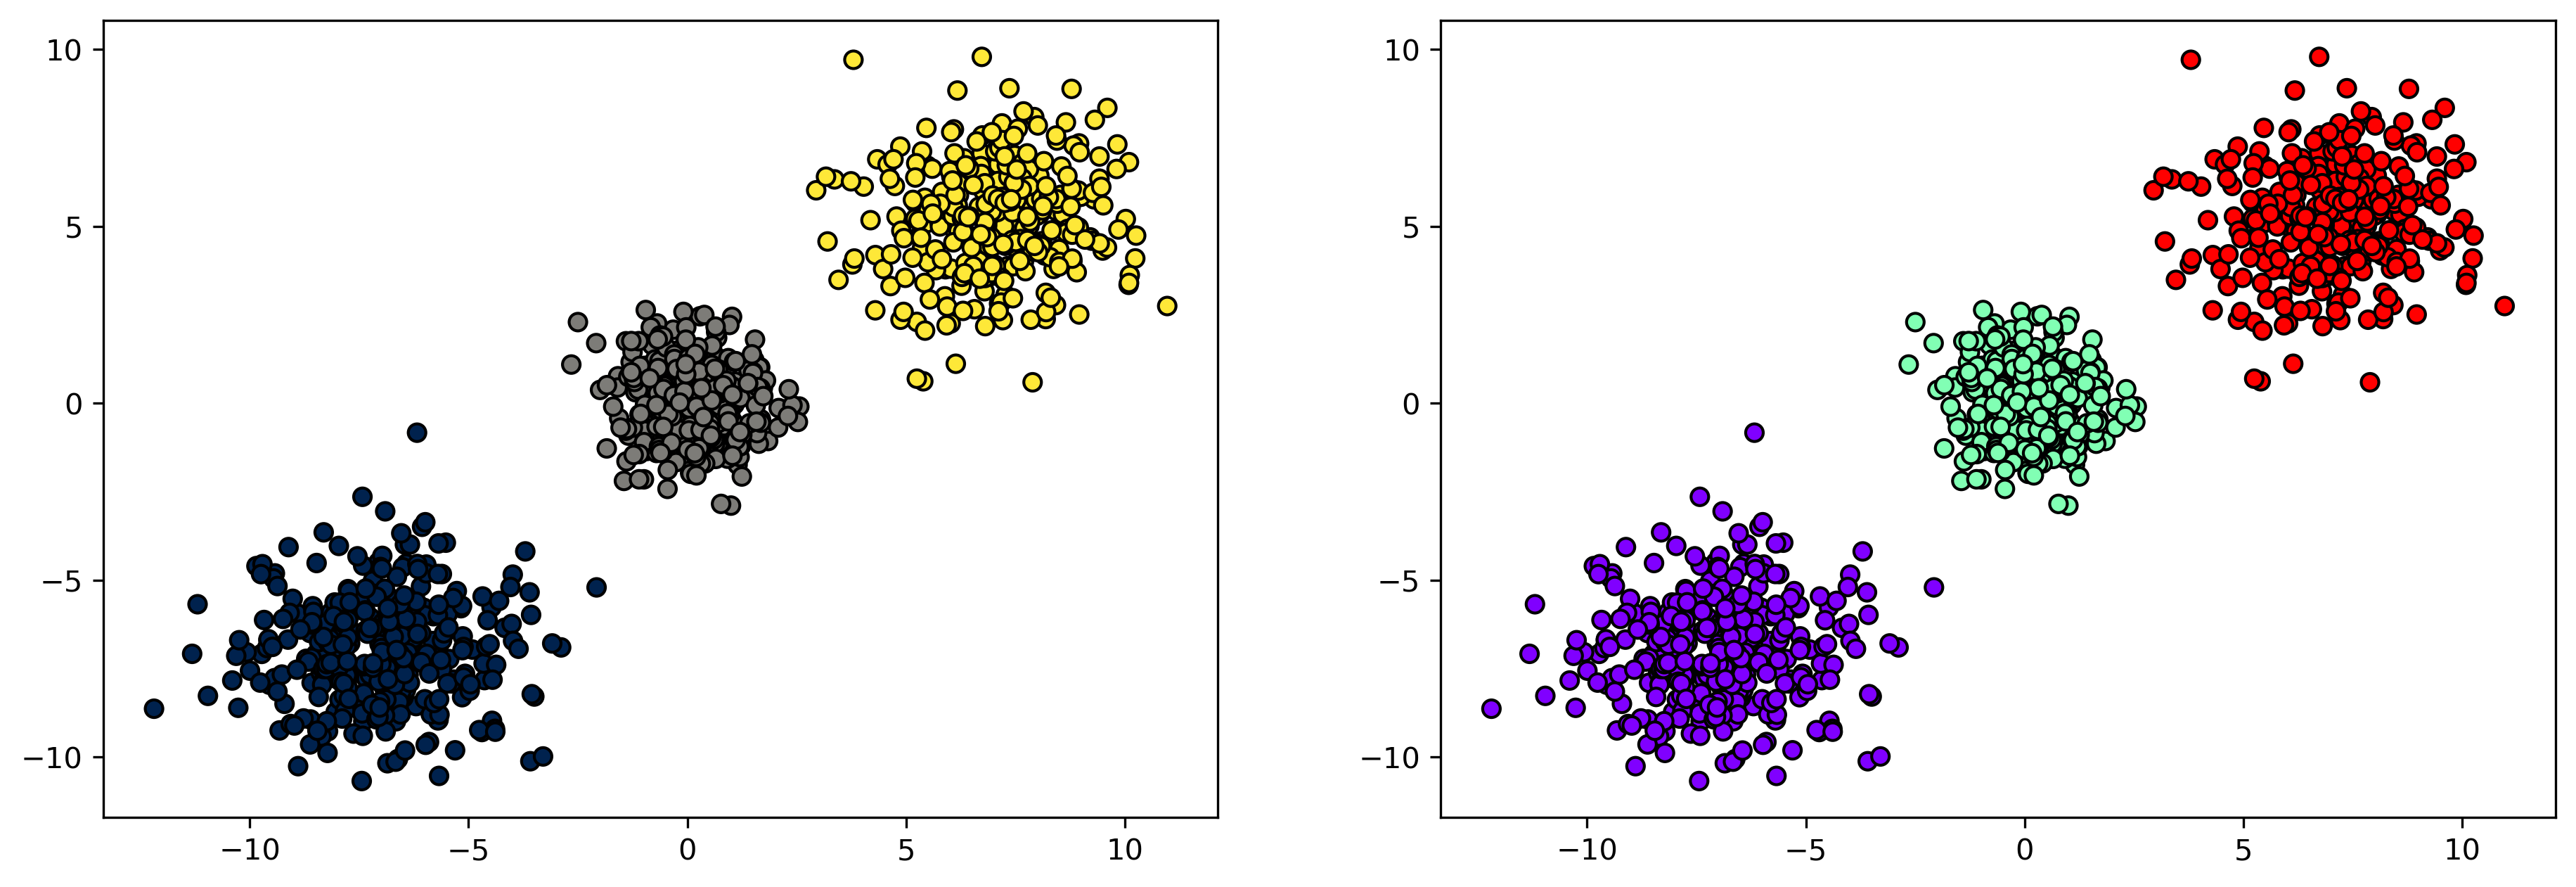

In [23]:
label_sc = np.array([])
for i in range(len(X)):
    label_ex_sc = model.predict([[X[i, 0], X[i, 1]]])
    label_sc = np.hstack([label_sc, label_ex_sc])

fig = plt.figure(figsize = (15, 5), dpi = 300)
# Априорные данные
ax = fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1],
            c = y, cmap = 'cividis', edgecolors = 'k')
# Расчетные данные
ax = fig.add_subplot(122)
plt.scatter(X[:, 0], X[:, 1],
            c = label_sc, cmap = 'rainbow', edgecolors = 'k')

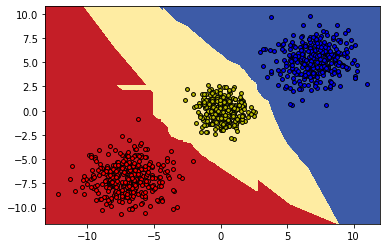

In [24]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
Z = sc_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, cmap = plt.cm.RdYlBu,
                edgecolor = 'black', s = 15)